# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [1]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav



In [2]:
!wget https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav

# 가상악기가 다 종합되어있는 파일

--2020-11-13 16:49:17--  https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.8
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409459756 (3.2G) [audio/wav]
Saving to: ‘GeneralMidi.wav’

GeneralMidi.wav     100%[===================>]   3.17G  16.8MB/s    in 3m 18s  

2020-11-13 16:52:36 (16.4 MB/s) - ‘GeneralMidi.wav’ saved [3409459756/3409459756]



In [3]:
midi_file = './GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [4]:
instruments = [0, 10, 20, 30, 40 ,50, 60, 70, 80, 90]
num_notes = 50
sec = 2

audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):   # 2초간격으로 split해줘야지
    instrument = instruments[inst_idx]  # 2초 간격으로 되어잇지
    offset = (instrument * num_notes*sec) + (note * sec)    # 자연스럽게 현재 instrument, note가 몇인지에 따라서  정해지겟지
    print('instrument: {}, note: {}, offset: {}'.format(instrument, note, offset))
    y, sr = librosa.load(midi_file, sr = None, offset = offset, duration = 2.0) # mini file에서 offset만큼
    audio.append(y) # 해당하는 2초의 오디오가 나오고
    inst.append(inst_idx)   # 악기를 구분하는 값



instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

In [5]:
# 10개씩 악기를 띄워서 했으니까 
# 해당하는 전체의 길이에서 offset만 가져오는거지
# 악기하나당 50개의 음을 가지는걸로 총 500개가 있는거지

import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


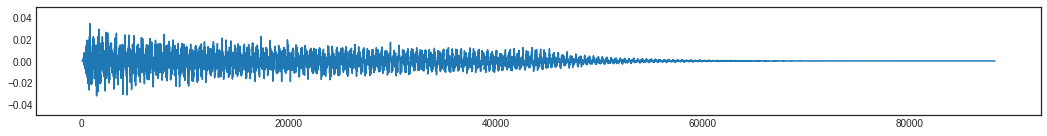

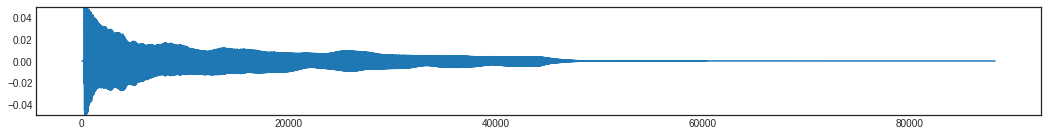

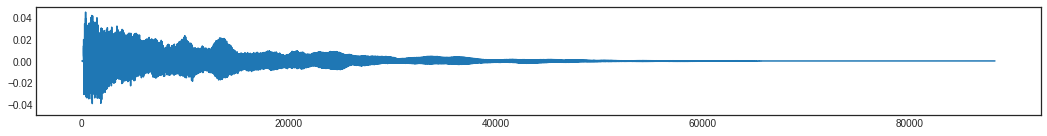

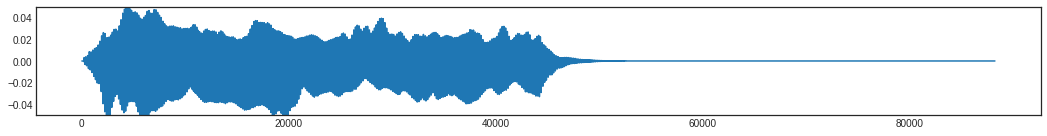

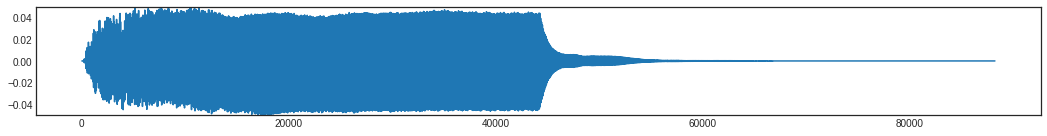

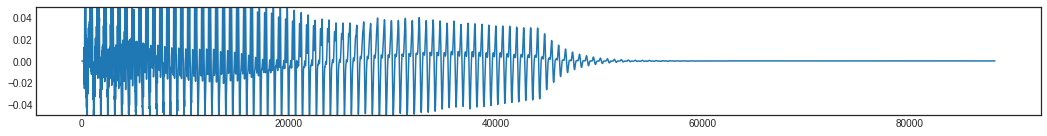

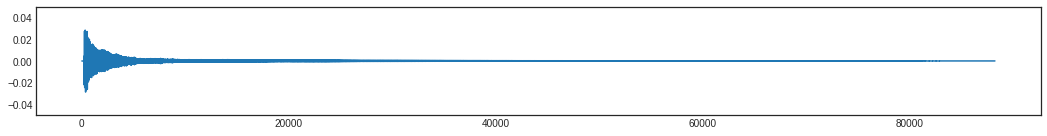

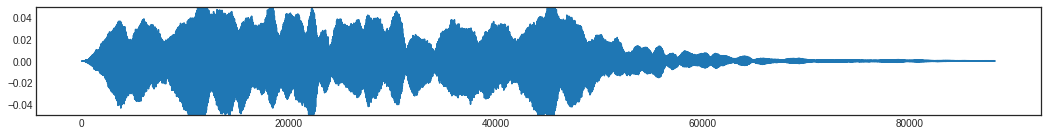

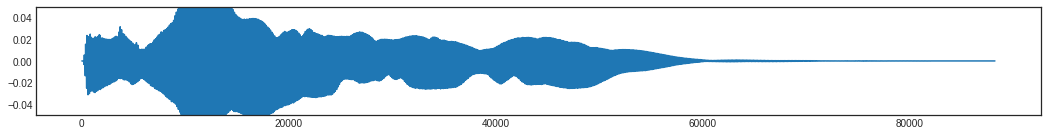

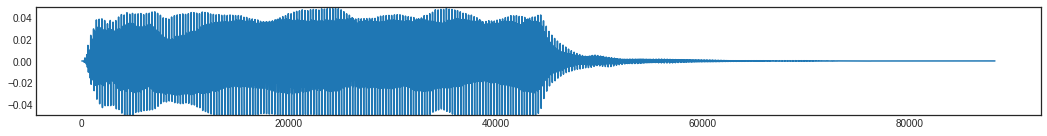

In [6]:


for idx in range(0, len(audio_np), num_notes):      # 현재 10개중에 50단위로 출렸했어
    plt.figure(figsize = (18 , 2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05, 0.05))
    plt.show()

    # 악기종류에 따라 모양이 조금씩 다른걸 볼수있지
    # 시각화로 보여준거야

In [7]:
# 이번엔 직접 들어보자고

print(inst_np[0])
ipd.Audio(audio_np[0], rate = sr)

0


In [8]:
# 이번 악기소리는 뭘까
print(inst_np[50])
ipd.Audio(audio_np[50], rate = sr)



1


In [9]:
# 이번엔?
print(inst_np[100])
ipd.Audio(audio_np[100], rate = sr)


2


In [10]:
# 이번엔 4번째 악기야

print(inst_np[150])
ipd.Audio(audio_np[150], rate = sr)


3


In [11]:
# 5번째

print(inst_np[200])
ipd.Audio(audio_np[200], rate = sr)


4


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [13]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.shape)

# 500개중에서 20%를 뽑아왔으니까

(400, 88200)
(100, 88200)
(400,)
(400,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [14]:
# 분류니까 로지스틱이지만 다중엔 좋진 않지

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 결과가 참담하구만.. 6% 라니..

0.08


### Support Vector Machine

In [15]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 6퍼라 똑같네..

0.05


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)

# 일단은 데이터 자체가 88200이라 매우 길지? 당연히 처리를 잘 못하지
# 음.. 상대적으론 44% 나왔넹

0.3


## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [17]:
audio_cqt = []
for y in audio: # 500개의 오디오를 리스트에 저장해놨잖아
    ret = librosa.cqt(y, sr, hop_length = 1024, n_bins = 24* 7, bins_per_octave = 24)   # 24개씩 7개 옥타브 단계 갯수
    ret = np.abs(ret)
    audio_cqt.append(ret)
    


* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

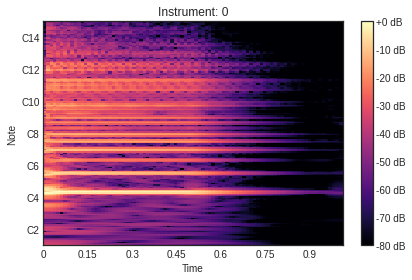

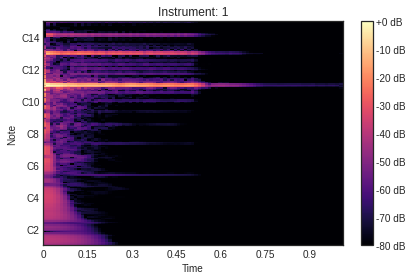

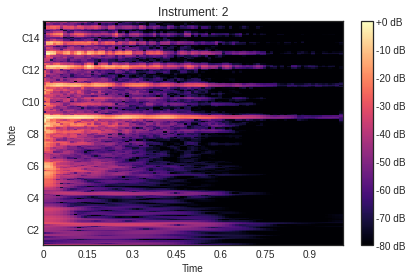

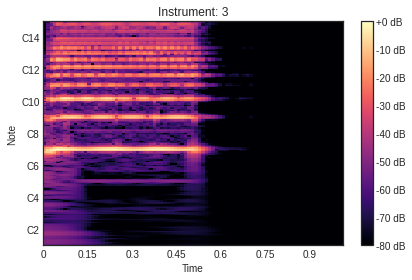

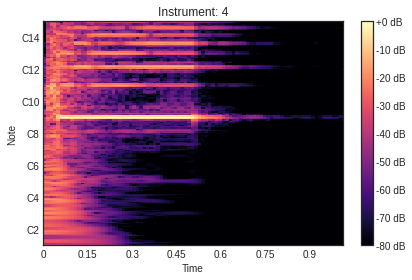

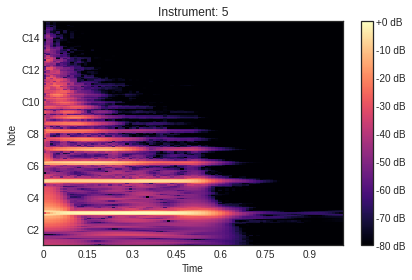

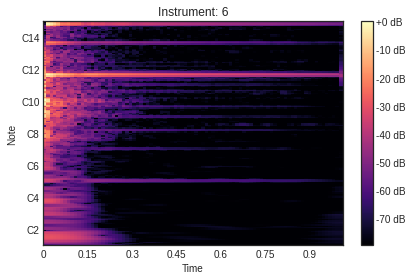

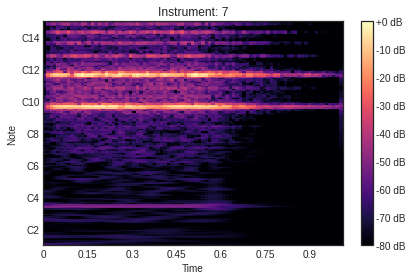

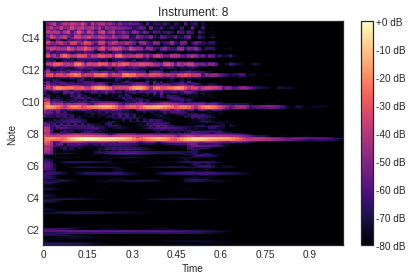

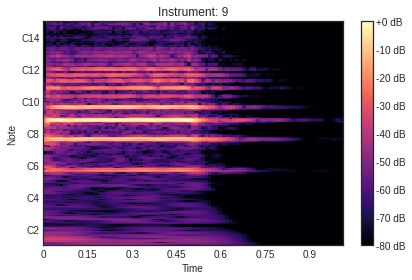

In [18]:
for i in range(0 , len(instruments) * num_notes, num_notes):     # instr 10개 num은 50 // 즉 500중에 50단위로 넘자
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref = np.max)
    librosa.display.specshow(amp_db, sr = sr, x_axis = 'time', y_axis = 'cqt_note')
    plt.colorbar(format = '% + 2.0f dB')
    plt.title('Instrument: {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

    # 0~ 9까지 총 10개의 악기

* 훈련 데이터와 실험 데이터를 분리

In [19]:
# 위의 특성을 반영해서 한번 학습시켜보자
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

# 3차원 형태잖아

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [20]:
cqt_np = cqt_np.reshape((500,168*87))




*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [21]:
# 비슷하지만 음량의 붐위가 다를수잇잖아

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)



MinMaxScaler(copy=True, feature_range=(0, 1))

* 학습 데이터와 실험 데이터를 분리

In [22]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(train_y.shape)

# 기존엔 88200이였잖아. 시계열 그대로
# 근데 14616으로 줄었지?


(400, 14616)
(100, 14616)
(400,)
(400,)


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 오 아까보단 낫네

0.31


### Support Vector Machine

In [24]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 오 이것도 3퍼에서 43퍼

0.28


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)

# 홍옹이 68퍼까지

0.6


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [26]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape((500, 168*87))
cqt_array = np.expand_dims(cqt_np, -1)

inst_cat = to_categorical(inst_np)
train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat,test_size = 0.2)

print(train_x.shape)       
print(test_x.shape)     # 500개에 대해서 400/ 100으로 나눴지 / 그리고 지금 cqt니까 / reshape으로 쫙 펴주고
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [41]:
from keras.models import Sequential, Model
from keras.layers import Input,Dense

def model_build():
    model  = Sequential()

    input = Input(shape = (14616, ), name = 'input')
    # output = Dense(512, activation = 'relu', name = 'hidden1')(input)
    output = Dense(128, activation = 'relu', name = 'hidden1')(input)
    output = Dense(64, activation = 'relu', name = 'hidden2')(output)
    output = Dense(10, activation = 'softmax', name = 'output')(output)

    model = Model(inputs = [input], outputs = output)
 

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])
    
    return model
    # output = Dense(512, activation = 'relu', name = 'output')(input)

In [42]:
model = model_build()
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14616)]           0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               1870976   
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,879,882
Trainable params: 1,879,882
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(train_x, train_y, epochs = 30, batch_size = 128, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 0s 44ms/step - loss: 2.2418 - acc: 0.1344 - val_loss: 2.1152 - val_acc: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 9ms/step - loss: 1.9598 - acc: 0.4406 - val_loss: 1.9942 - val_acc: 0.2625
Epoch 3/30
3/3 [==============================] - 0s 10ms/step - loss: 1.7532 - acc: 0.5625 - val_loss: 1.9063 - val_acc: 0.2875
Epoch 4/30
3/3 [==============================] - 0s 10ms/step - loss: 1.5667 - acc: 0.5906 - val_loss: 1.8531 - val_acc: 0.2750
Epoch 5/30
3/3 [==============================] - 0s 9ms/step - loss: 1.4012 - acc: 0.6469 - val_loss: 1.8355 - val_acc: 0.2750
Epoch 6/30
3/3 [==============================] - 0s 9ms/step - loss: 1.2509 - acc: 0.7125 - val_loss: 1.8309 - val_acc: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 9ms/step - loss: 1.1181 - acc: 0.7531 - val_loss: 1.8464 - val_acc: 0.2375
Epoch 8/30
3/3 [==============================] - 0s 9ms/step - loss: 0.9973 - acc: 0.8000 - val_loss

In [44]:
def plot_history(history_dict):
    loss = history_dict['loss'] 
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize = (14,5))

    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs, loss, 'b--', label = 'train_loss')
    ax1.plot(epochs, val_loss, 'r:', label = 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()


    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs, acc, 'b--', label = 'train_acc')
    ax2.plot(epochs, val_acc, 'r:', label = 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

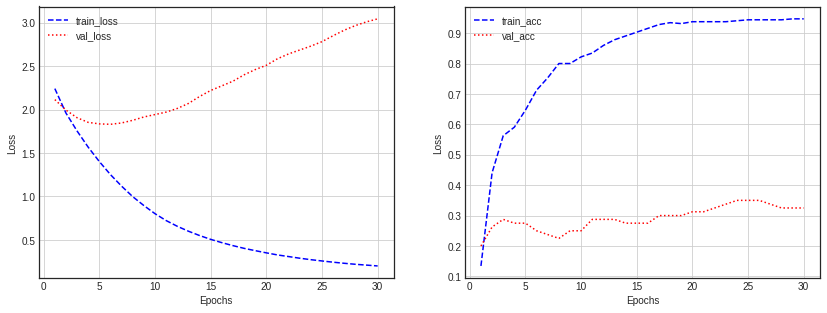

In [45]:
plot_history(history.history)

# 데이터가 적어서?

In [46]:
model.evaluate(test_x, test_y)

# 너무 아직 저조하고
# dense만 쓰니까

# 모델이 너무 깊어서?

4/4 [==============================] - 0s 3ms/step - loss: 4.1649 - acc: 0.2700


[4.164884567260742, 0.27000001072883606]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [53]:
# 딱봐도 약간의 이미지같은거니까 cnn모델을 사용해서 해보자
from keras.utils import to_categorical


cqt_np = np.array(audio_cqt, np.float32)
cqt_np = np.array(audio_cqt, np.float32)
# cqt_np = cqt_np.reshape((500, 168*87))
cqt_array = np.expand_dims(cqt_np, -1)

inst_cat = to_categorical(inst_np)
train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat,test_size = 0.2)

print(train_x.shape)       
print(test_x.shape)     # 500개에 대해서 400/ 100으로 나눴지 / 그리고 지금 cqt니까 / reshape으로 쫙 펴주고
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [54]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
    model = Sequential()

    input = Input(shape = (168,87, 1))

    output = Conv2D(128,3, strides = 1, padding = 'same', activation = 'relu')(input)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Conv2D(256,3, strides = 1, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Conv2D(512,3, strides = 1, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Flatten()(output)
    output = Dense(512, activation = 'relu')(output)
    output = Dense(256, activation = 'relu')(output)
    output = Dense(128, activation = 'relu')(output)
    
    output = Dense(10, activation = 'softmax')(output)
    
    model = Model(inputs = [input], outputs = output)

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])
    
    return model

In [55]:
model = model_build()
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 168, 87, 1)]      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 168, 87, 128)      1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 44, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 84, 44, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 22, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 42, 22, 512)       1180160   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 11, 512)      

In [56]:
history = model.fit(train_x , train_y, epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
3/3 [==============================] - 2s 677ms/step - loss: 2.2365 - acc: 0.1844 - val_loss: 2.0393 - val_acc: 0.2250
Epoch 2/20
3/3 [==============================] - 1s 230ms/step - loss: 1.9207 - acc: 0.3438 - val_loss: 1.7738 - val_acc: 0.3000
Epoch 3/20
3/3 [==============================] - 1s 222ms/step - loss: 1.3490 - acc: 0.5906 - val_loss: 1.8342 - val_acc: 0.3375
Epoch 4/20
3/3 [==============================] - 1s 223ms/step - loss: 1.0169 - acc: 0.6406 - val_loss: 1.6093 - val_acc: 0.4250
Epoch 5/20
3/3 [==============================] - 1s 219ms/step - loss: 0.7626 - acc: 0.7156 - val_loss: 1.0537 - val_acc: 0.6375
Epoch 6/20
3/3 [==============================] - 1s 223ms/step - loss: 0.5574 - acc: 0.8250 - val_loss: 0.8698 - val_acc: 0.7000
Epoch 7/20
3/3 [==============================] - 1s 225ms/step - loss: 0.3546 - acc: 0.9062 - val_loss: 1.3173 - val_acc: 0.6000
Epoch 8/20
3/3 [==============================] - 1s 225ms/step - loss: 0.3400 - acc: 0.90

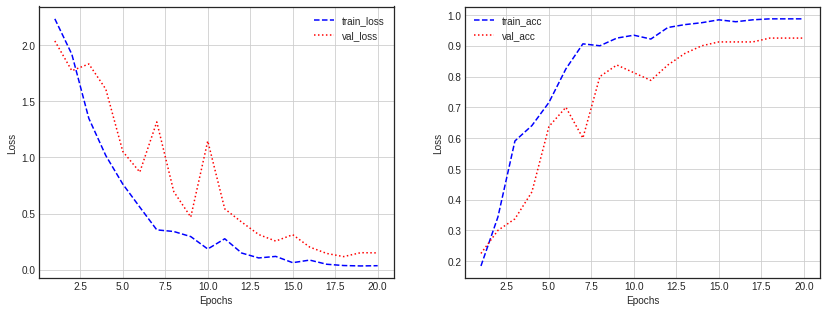

In [57]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [58]:
model.evaluate(test_x, test_y)

# 몇퍼로 나왔으려나
# 오우야 93퍼는 오지게 잘나왓네

4/4 [==============================] - 0s 33ms/step - loss: 0.2177 - acc: 0.9400


[0.21766775846481323, 0.9399999976158142]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [59]:
# 사실 더 높게 성능을 올릴수 있대

audio_mfcc = []
for y in audio:
    ret = librosa.feature.mfcc(y=y, sr=sr)
    audio_mfcc.append(ret)
    

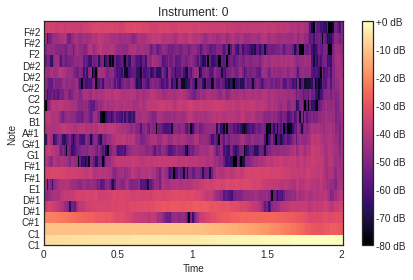

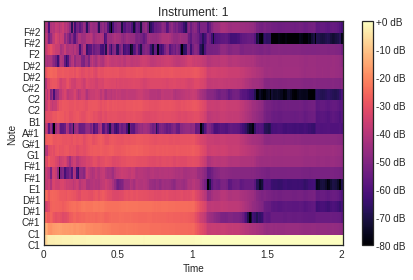

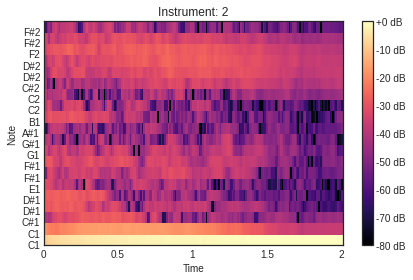

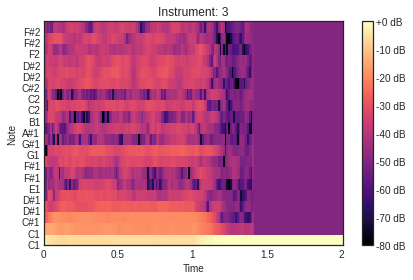

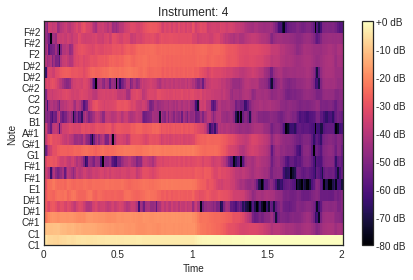

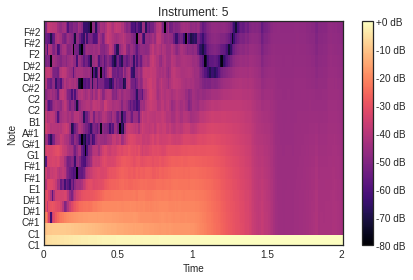

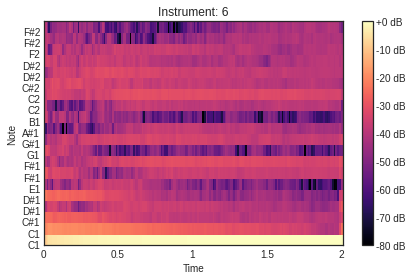

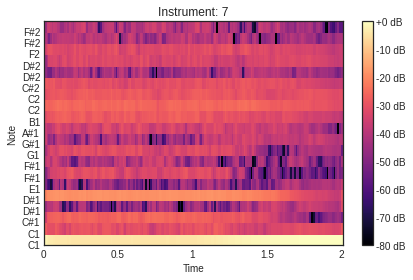

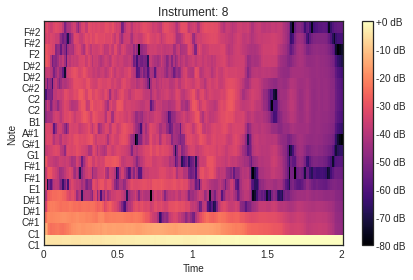

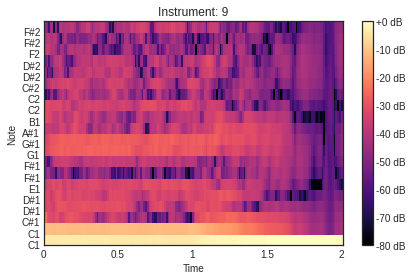

In [60]:
for i in range(0, len(instruments) * num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref = np.max)
    librosa.display.specshow(amp_db, sr= sr, x_axis = 'time', y_axis = 'cqt_note')
    plt.colorbar(format = '%+2.0f dB')
    plt.title('Instrument: {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

# cqt constant랑 차이점이 있지
# 악기별로 다른 차이점이 있는걸 알수 있어


In [61]:
mfcc_np = np.array(audio_mfcc, np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

# 데이터가 더 줄었지?

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [64]:
mfcc_np = mfcc_np.reshape((500, 20 * 173))




*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

* 학습 데이터와 실험 데이터를 분리

In [68]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size = 0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(400, 3460)
(100, 3460)
(400,)
(100,)


### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 오 아까보단 낫네 - >96

# 즉 오디오 feature를 뭘 쓰느냐에 따라 다른거지
# 즉 작은 데이터에 대해서도(3460) 성능 확실하구만

0.96


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machine

In [70]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

# 오 이것도 3퍼에서 43퍼 -> 99

0.99


### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)

# 홍옹이 68퍼까지 - > 87

0.87


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

In [74]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500, 20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)

inst_cat = to_categorical(inst_np)
train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat,test_size = 0.2)

print(train_x.shape)       
print(test_x.shape)     # 500개에 대해서 400/ 100으로 나눴지 / 그리고 지금 cqt니까 / reshape으로 쫙 펴주고
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [75]:
# 모델은 그대로. 단지 mfcc// 어떤 오디어feature을 가져오는지에 따라 많이 다르다는거지

from keras.models import Sequential, Model
from keras.layers import Input,Dense

def model_build():
    model  = Sequential()

    input = Input(shape = (3460, ), name = 'input')
    # output = Dense(512, activation = 'relu', name = 'hidden1')(input)
    output = Dense(128, activation = 'relu', name = 'hidden1')(input)
    output = Dense(64, activation = 'relu', name = 'hidden2')(output)
    output = Dense(10, activation = 'softmax', name = 'output')(output)

    model = Model(inputs = [input], outputs = output)
 

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])
    
    return model
    # output = Dense(512, activation = 'relu', name = 'output')(input)

In [76]:
model = model_build()
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3460)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 128)               443008    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 451,914
Trainable params: 451,914
Non-trainable params: 0
_________________________________________________________________


In [77]:
history = model.fit(train_x, train_y, epochs = 30, batch_size = 128, validation_split = 0.2)

Epoch 1/30
3/3 [==============================] - 0s 40ms/step - loss: 142.4834 - acc: 0.1094 - val_loss: 219.7383 - val_acc: 0.1375
Epoch 2/30
3/3 [==============================] - 0s 7ms/step - loss: 183.3741 - acc: 0.1656 - val_loss: 157.1684 - val_acc: 0.1750
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 123.2903 - acc: 0.2781 - val_loss: 77.6948 - val_acc: 0.2750
Epoch 4/30
3/3 [==============================] - 0s 7ms/step - loss: 61.3207 - acc: 0.2156 - val_loss: 40.4378 - val_acc: 0.2500
Epoch 5/30
3/3 [==============================] - 0s 7ms/step - loss: 30.2461 - acc: 0.3875 - val_loss: 27.8898 - val_acc: 0.3250
Epoch 6/30
3/3 [==============================] - 0s 7ms/step - loss: 18.2683 - acc: 0.4500 - val_loss: 14.6101 - val_acc: 0.5000
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 13.5557 - acc: 0.5250 - val_loss: 14.3686 - val_acc: 0.4875
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 10.2458 - acc:

In [78]:
def plot_history(history_dict):
    loss = history_dict['loss'] 
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize = (14,5))

    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs, loss, 'b--', label = 'train_loss')
    ax1.plot(epochs, val_loss, 'r:', label = 'val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()


    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs, acc, 'b--', label = 'train_acc')
    ax2.plot(epochs, val_acc, 'r:', label = 'val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

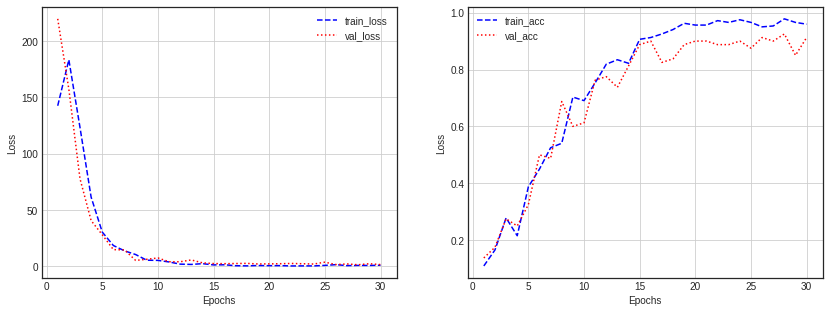

In [79]:
plot_history(history.history)

# 데이터가 적어서?

In [80]:
model.evaluate(test_x, test_y)

# d오 88퍼

4/4 [==============================] - 0s 2ms/step - loss: 2.0586 - acc: 0.8900


[2.0585854053497314, 0.8899999856948853]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [81]:
# 딱봐도 약간의 이미지같은거니까 cnn모델을 사용해서 해보자
from keras.utils import to_categorical


mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat,test_size = 0.2)

print(train_x.shape)       
print(test_x.shape)     #
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [82]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
    model = Sequential()

    input = Input(shape = (20,173, 1))

    output = Conv2D(128,3, strides = 1, padding = 'same', activation = 'relu')(input)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Conv2D(256,3, strides = 1, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Conv2D(512,3, strides = 1, padding = 'same', activation = 'relu')(output)
    output = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(output)

    output = Flatten()(output)
    output = Dense(512, activation = 'relu')(output)
    output = Dense(256, activation = 'relu')(output)
    output = Dense(128, activation = 'relu')(output)
    
    output = Dense(10, activation = 'softmax')(output)
    
    model = Model(inputs = [input], outputs = output)

    model.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['acc'])
    
    return model

In [83]:
model = model_build()
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 20, 173, 1)]      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 173, 128)      1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 87, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 87, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 44, 256)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 44, 512)        1180160   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 22, 512)      

In [84]:
history = model.fit(train_x , train_y, epochs = 20, batch_size = 128, validation_split = 0.2)

Epoch 1/20
3/3 [==============================] - 1s 248ms/step - loss: 63.2150 - acc: 0.1250 - val_loss: 63.3505 - val_acc: 0.0750
Epoch 2/20
3/3 [==============================] - 0s 65ms/step - loss: 40.7386 - acc: 0.0750 - val_loss: 4.8040 - val_acc: 0.1125
Epoch 3/20
3/3 [==============================] - 0s 65ms/step - loss: 4.0637 - acc: 0.1187 - val_loss: 2.2689 - val_acc: 0.1250
Epoch 4/20
3/3 [==============================] - 0s 65ms/step - loss: 2.3192 - acc: 0.1125 - val_loss: 2.3016 - val_acc: 0.0625
Epoch 5/20
3/3 [==============================] - 0s 65ms/step - loss: 2.2600 - acc: 0.1281 - val_loss: 2.2536 - val_acc: 0.1625
Epoch 6/20
3/3 [==============================] - 0s 64ms/step - loss: 2.2047 - acc: 0.2062 - val_loss: 2.1134 - val_acc: 0.2500
Epoch 7/20
3/3 [==============================] - 0s 64ms/step - loss: 2.0046 - acc: 0.2906 - val_loss: 1.8346 - val_acc: 0.4125
Epoch 8/20
3/3 [==============================] - 0s 63ms/step - loss: 1.8306 - acc: 0.3187 -

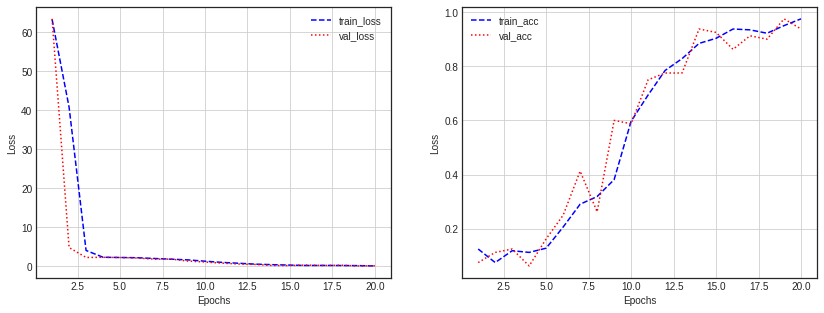

In [85]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [86]:
model.evaluate(test_x, test_y)

# 몇퍼로 나왔으려나
# 97퍼 ㅆㅅㅌㅊ

4/4 [==============================] - 0s 20ms/step - loss: 0.1416 - acc: 0.9700


[0.1416339874267578, 0.9700000286102295]

In [ ]:
# 매우 기니까 88000 단위니까
# 적절한 feature을 가져와 쓰는게 매우 효율적